In [1]:
from from_coords import *

In [2]:
config_path = 'weights/inria_config.json'
model_weight_path = 'weights/inria_weights.pth'
bounding_box = [[46.517912578729074, 6.560691102288617], [46.5161576863163, 6.563115234250399]]
parcel_polygon = [[46.51656344681835, 6.560728158801604], [46.517934700120776, 6.561210771709841], \
            [46.5179253876136, 6.5622765043554905], [46.51794845035286, 6.563045957013022], \
                  [46.51681718786281, 6.562760313143832], [46.51634223819382, 6.561474667412574]]
mapbox_api_key = 'pk.eyJ1Ijoic3RhbmR1YyIsImEiOiJja21vbXdrOXUwNmE0MnFvOXVuanowMGl0In0.gvmSBOYLGavx8nhgAYTO5Q'
import timeit
starttime = timeit.default_timer()
image, buildings, dists, nb_comp, parcelle_coords_xy = segment_buildings(config_path, model_weight_path, \
                                                                 bounding_box, mapbox_api_key, parcel_polygon)
print("The time difference is :", timeit.default_timer() - starttime)

The time difference is : 15.531299113004934


<Figure size 1440x1440 with 0 Axes>

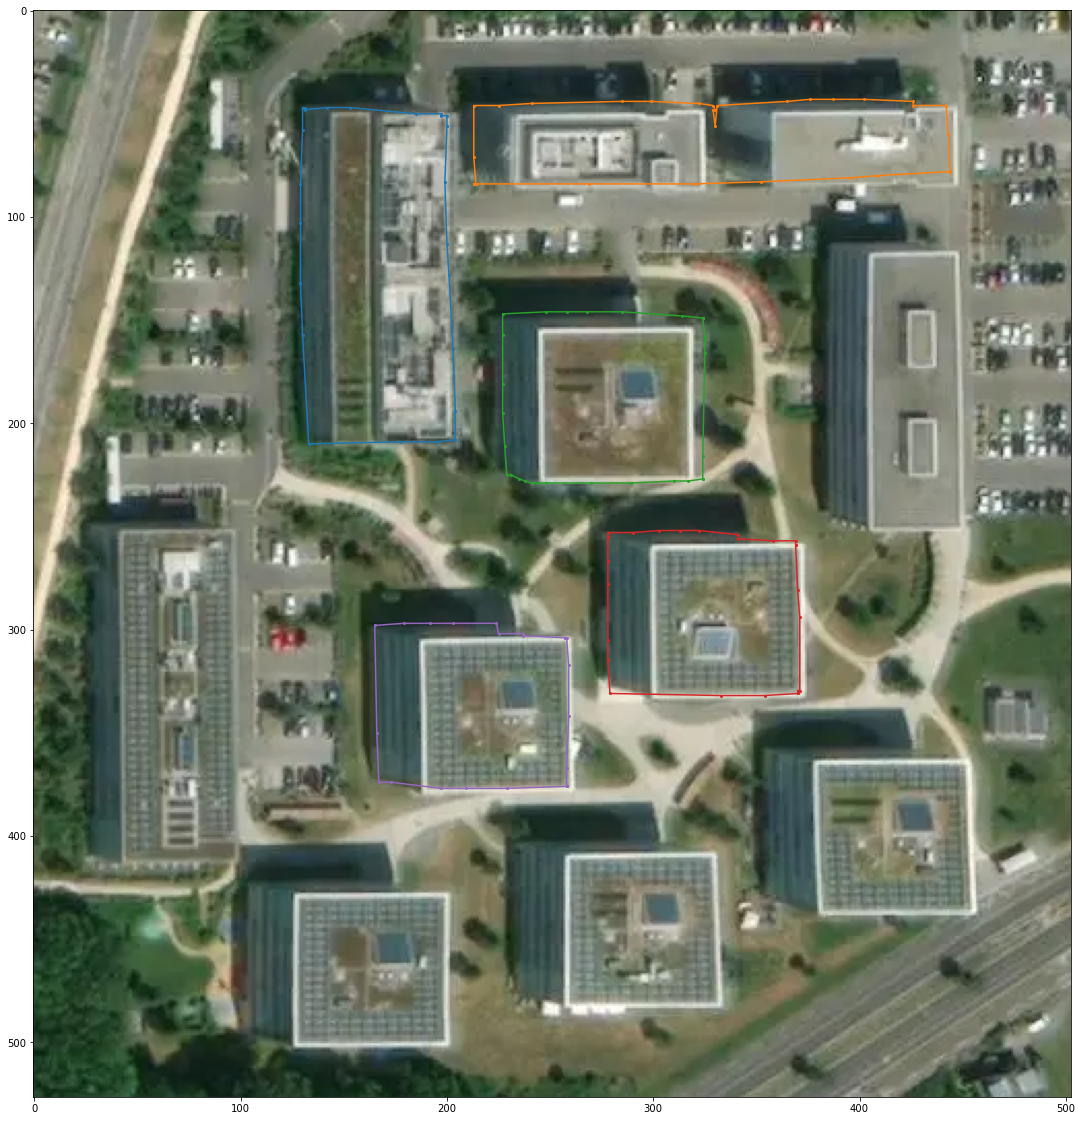

In [5]:
plt.figure(figsize=(20,20))
load_image = io.BytesIO(image)
im = np.load(load_image, allow_pickle=True)
plt.figure(figsize=(20,20))
plt.imshow(im);
for building in buildings:
    contour = np.array(building['xy'])
    if building['area'] > 0.0:
        plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);
parcelle_coords_xy = np.array(parcelle_coords_xy)
#plt.plot(*(parcelle_coords_xy[:,0], parcelle_coords_xy[:,1]), '-o', markersize=2);

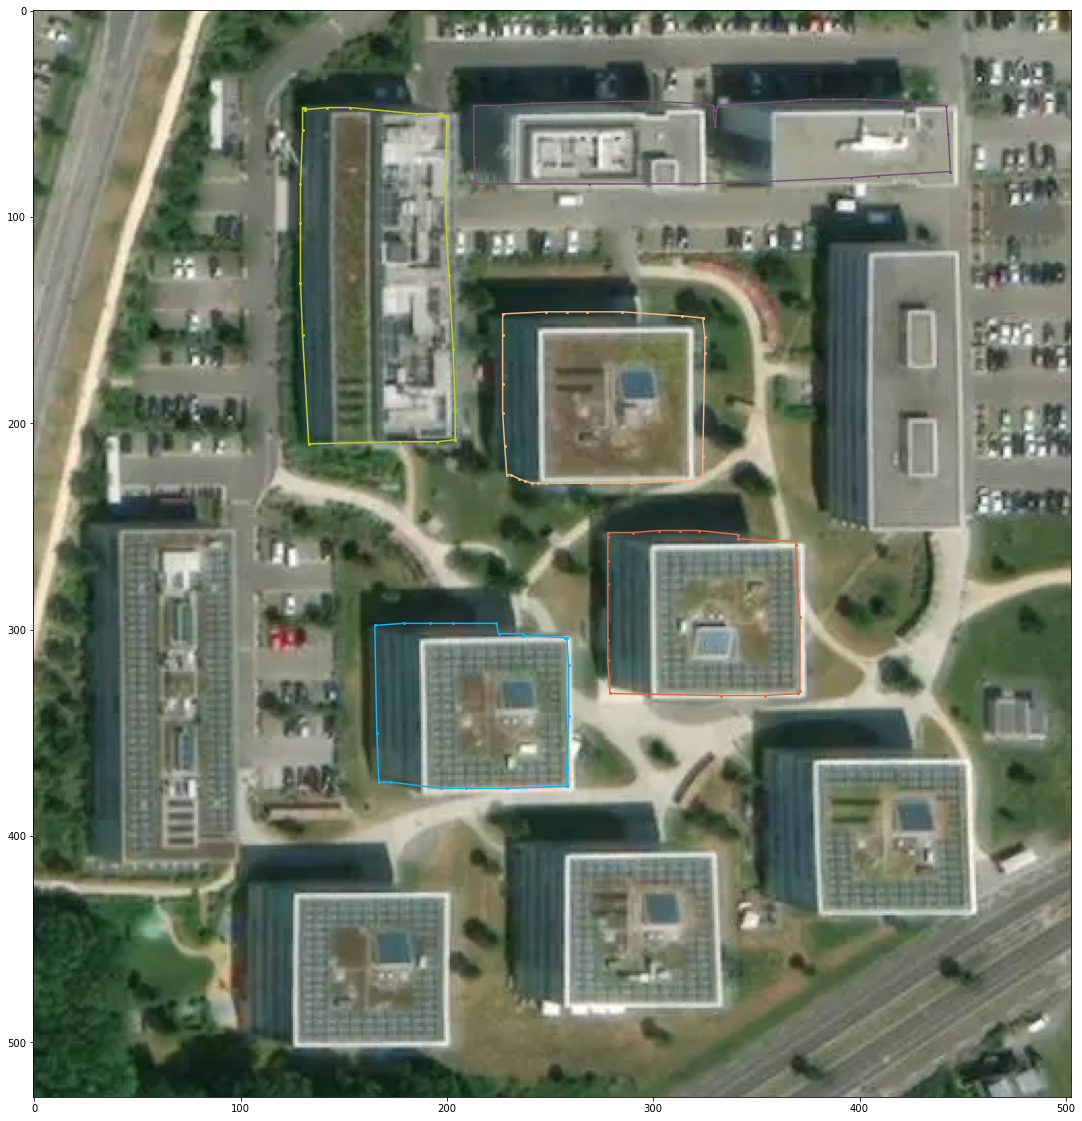

In [6]:
colors = np.random.rand(nb_comp, 3)
plt.figure(figsize=(20,20))
plt.imshow(im)
for building in buildings:
    contour = np.array(building['xy'])
    plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2, c=colors[building['comp'],:]);

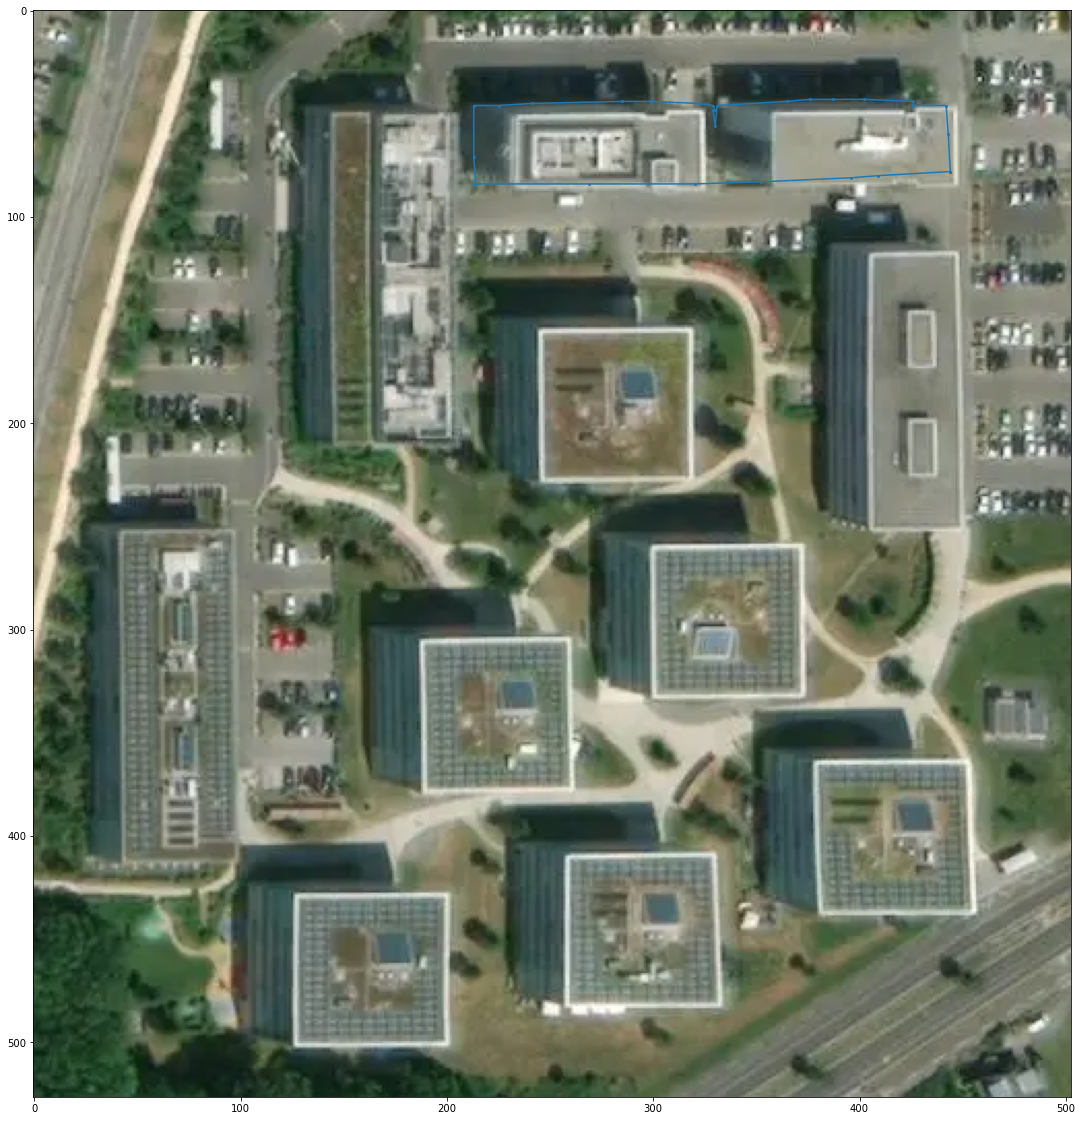

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(im)
contour = np.array(buildings[1]['xy'])
plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);

In [8]:
buildings[1]

{'xy': [(444, 78),
  (443, 60),
  (442, 46),
  (426, 46),
  (426, 44),
  (402, 43),
  (387, 43),
  (376, 43),
  (365, 44),
  (331, 46),
  (330, 56),
  (329, 48),
  (330, 48),
  (329, 46),
  (322, 45),
  (299, 44),
  (285, 44),
  (241, 45),
  (225, 46),
  (213, 46),
  (213, 71),
  (214, 84),
  (213, 84),
  (213, 84),
  (269, 84),
  (320, 84),
  (352, 83),
  (396, 81),
  (409, 80),
  (444, 78),
  (444, 78)],
 'lat_long': [(46.51772023722176, 6.562936305999756),
  (46.5177866832659, 6.562930941581726),
  (46.51783836352246, 6.562925577163696),
  (46.51783836352246, 6.56283974647522),
  (46.517845746416256, 6.56283974647522),
  (46.51784943786315, 6.562711000442505),
  (46.51784943786315, 6.562630534172058),
  (46.51784943786315, 6.5625715255737305),
  (46.517845746416256, 6.562512516975403),
  (46.51783836352246, 6.56233012676239),
  (46.517801449053486, 6.56232476234436),
  (46.517830980628666, 6.562319397926331),
  (46.517830980628666, 6.56232476234436),
  (46.51783836352246, 6.56231939

In [9]:
dists

array([[ 0.        ,  5.33611217,  9.44081384, 35.55016093, 36.12132809],
       [ 5.33611217,  0.        , 25.44922989, 68.95947997, 87.43027033],
       [ 9.44081384, 25.44922989,  0.        ,  9.44088119, 28.67428698],
       [35.55016093, 68.95947997,  9.44088119,  0.        ,  7.79893317],
       [36.12132809, 87.43027033, 28.67428698,  7.79893317,  0.        ]])